# Data Analysis

- NDB_No: National Nutrient Database Number (Integer)
- Descrip: Description of the food (String)
- Energy_kcal: Energy in kilocalories (Integer)
- Protein_g: Protein in grams (Float)
- Saturated_fats_g: Saturated fats in grams (Float)
- Fat_g: Fat in grams (Float)
- Carb_g: Carbohydrates in grams (Float)
- Fiber_g: Fiber in grams (Float)
- Sugar_g: Sugar in grams (Float)
- Calcium_mg: Calcium in milligrams (Float)
- Iron_mg: Iron in milligrams (Float)
- Magnesium_mg: Magnesium in milligrams (Float)
- Phosphorus_mg: Phosphorus in milligrams (Float)
- Potassium_mg: Potassium in milligrams (Float)
- Sodium_mg: Sodium in milligrams (Float)
- Zinc_mg: Zinc in milligrams (Float)
- Copper_mcg: Copper in micrograms (Float)
- Manganese_mg: Manganese in milligrams (Float)
Selenium_mcg: Selenium in micrograms (Float)
VitC_mg: Vitamin C in milligrams (Float)

In [314]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/dataset.csv')
df.head()

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.0,0.85,51.368,81.11,0.06,0.0,0.06,24.0,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.0,0.49,45.390,78.30,2.87,0.0,0.06,23.0,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.0,0.28,61.924,99.48,0.00,0.0,0.00,4.0,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.8,0.0
3,1004,cheese blue,353.0,21.40,18.669,28.74,2.34,0.0,0.50,528.0,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.0,23.24,18.764,29.68,2.79,0.0,0.51,674.0,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5


### Data Assessing

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9318 non-null   object 
 1   Descrip           9318 non-null   object 
 2   Energy_kcal       9318 non-null   float64
 3   Protein_g         9318 non-null   float64
 4   Saturated_fats_g  9318 non-null   float64
 5   Fat_g             9318 non-null   float64
 6   Carb_g            9318 non-null   float64
 7   Fiber_g           9318 non-null   float64
 8   Sugar_g           9318 non-null   float64
 9   Calcium_mg        9318 non-null   float64
 10  Iron_mg           9318 non-null   float64
 11  Magnesium_mg      9318 non-null   object 
 12  Phosphorus_mg     9318 non-null   float64
 13  Potassium_mg      9318 non-null   float64
 14  Sodium_mg         9318 non-null   float64
 15  Zinc_mg           9318 non-null   float64
 16  Copper_mcg        9318 non-null   float64


the column `Magnesium_mg`, `ViitE_mg` datatype should be `float64`. Before that, let's find out if it's intentionally object data-type or a fault.

In [316]:
df.isnull().any().value_counts()

False    29
Name: count, dtype: int64

In [317]:
df.duplicated().value_counts()

False    9318
Name: count, dtype: int64

In [318]:
pattern = '[0-9]*.[0-9]\\s|[^0-9.]'

In [319]:
matches_mag = df.Magnesium_mg.str.contains(pattern, regex=True, case=False)
matches_mag.value_counts()

Magnesium_mg
False    9317
True        1
Name: count, dtype: int64

it seems like there's one non-numeric row, let's find out what it is.

In [320]:
df.loc[matches_mag].loc[:, 'Magnesium_mg']

9242    X
Name: Magnesium_mg, dtype: object

We don't know why thevalue is `X`on index 9242 for `Magnesium_mg`, we will see on the `VitE_mg` column whether there's a similar case like this or not.

In [321]:
matches_vit = df.VitE_mg.str.contains(pattern, regex=True, case=False)
df.loc[matches_vit]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0


Wow, there's 6 rows unusual VitE_mg. It seems like there's a miistake when inputting these data. For better data understanding, we will remove them from dataframe and convert the `VitE_mg` and `Magnesium_mg` column into float64.

In [322]:
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
9195,O058,hare shoulder,144.117,21.13,2.698,6.58,0.0,0.0,0.0,57.51,...,0.0,0.07,0.27,5.04,0.28,2.20,0.0,0.0,0.58 1.46,0.0
9196,O059,hare chops,106.355,20.62,1.028,2.55,0.0,0.0,0.0,38.36,...,0.0,0.07,0.28,4.85,0.22,3.85,0.0,0.0,0.69 1.73,0.0
9197,O060,hare leg,120.217,20.52,0.910,4.16,0.0,0.0,0.0,53.02,...,0.0,0.08,0.22,5.63,0.24,1.95,0.0,0.0,0.58 1.44,0.0
9198,O061,rabbit shoulder,151.765,20.01,3.142,7.96,0.0,0.0,0.0,46.37,...,0.0,0.03,0.14,4.38,0.30,1.80,0.0,0.0,0.49 1.22,0.0
9199,O062,rabbit chops,135.035,22.61,1.907,4.88,0.0,0.0,0.0,25.48,...,0.0,0.02,0.08,7.54,0.24,2.10,0.0,0.0,0.33 0.83,0.0
9200,O063,rabbit leg,139.576,21.31,1.575,5.99,0.0,0.0,0.0,22.31,...,0.0,0.03,0.10,5.02,0.26,1.80,0.0,0.0,0.29 0.72,0.0
9242,P042,nalla bontha,86.996,19.82,0.238,0.72,0.0,0.0,0.0,9.04,...,0.0,0.04,0.01,0.56,83.41,1714.00,0.0,0.0,0.9,0.0


In [323]:
df.drop(df.loc[matches_mag | matches_vit].index, inplace=True)

In [324]:
df.loc[matches_vit | matches_mag]

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg


In [325]:
df.Magnesium_mg = pd.to_numeric(df.Magnesium_mg)
df.VitE_mg = pd.to_numeric(df.VitE_mg)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9311 entries, 0 to 9317
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDB_No            9311 non-null   object 
 1   Descrip           9311 non-null   object 
 2   Energy_kcal       9311 non-null   float64
 3   Protein_g         9311 non-null   float64
 4   Saturated_fats_g  9311 non-null   float64
 5   Fat_g             9311 non-null   float64
 6   Carb_g            9311 non-null   float64
 7   Fiber_g           9311 non-null   float64
 8   Sugar_g           9311 non-null   float64
 9   Calcium_mg        9311 non-null   float64
 10  Iron_mg           9311 non-null   float64
 11  Magnesium_mg      9311 non-null   float64
 12  Phosphorus_mg     9311 non-null   float64
 13  Potassium_mg      9311 non-null   float64
 14  Sodium_mg         9311 non-null   float64
 15  Zinc_mg           9311 non-null   float64
 16  Copper_mcg        9311 non-null   float64
 17  

# Exploratory Data Analysis

In [326]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,1001,butter with salt,717.000,0.85,51.36800,81.11,0.06,0.0,0.06,24.00,...,0.0,0.005,0.034,0.042,0.003,3.0,0.17,684.0,2.32,0.0
1,1002,butter whipped w salt,718.000,0.49,45.39000,78.30,2.87,0.0,0.06,23.00,...,0.0,0.007,0.064,0.022,0.008,4.0,0.07,683.0,1.37,0.0
2,1003,butter oil anhydrous,876.000,0.28,61.92400,99.48,0.00,0.0,0.00,4.00,...,0.0,0.001,0.005,0.003,0.001,0.0,0.01,840.0,2.80,0.0
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.40,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.00,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


In [327]:
df.describe()

,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,Magnesium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
count,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,...,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000,9311.000000
mean,220.968805,11.314473,3.306599,10.206345,21.520262,2.151426,6.527797,73.655052,2.665231,33.628227,...,8.641603,0.201621,0.226651,3.299695,1.892777,36.491889,1.136141,89.200418,0.908306,0.344139
std,169.077023,10.438662,6.300781,15.580578,27.001992,4.454334,13.500564,198.202253,5.634001,57.354447,...,64.170982,0.495069,0.427517,4.648445,15.721772,161.148690,4.159903,750.929699,4.442515,3.005078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,86.000000,2.330000,0.135500,0.820000,0.000000,0.000000,0.000000,9.000000,0.490000,10.000000,...,0.000000,0.030000,0.042000,0.383000,0.037000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,183.000000,8.100000,1.318000,4.800000,8.730000,0.400000,0.470000,19.820000,1.300000,20.000000,...,0.000000,0.075000,0.145000,2.000000,0.124000,7.000000,0.010000,1.000000,0.130000,0.000000
75%,331.000000,19.850000,4.000000,13.220000,32.560000,2.500000,5.495000,64.000000,2.595000,30.000000,...,2.800000,0.217000,0.253000,4.934500,0.366000,19.000000,1.115000,19.000000,0.480000,0.000000
max,902.000000,88.320000,95.600000,100.000000,100.000000,79.000000,99.800000,7364.000000,123.600000,781.000000,...,2732.000000,23.375000,17.500000,127.500000,316.000000,2875.000000,98.890000,30000.000000,224.000000,250.000000


It seems like maximum value of calorie is too high for children. Since children daily calories intake are around 900-1200 kcal. We wll remove foods that has calories >= 500. And also, the total of saturated fats no more than 10% of total calories. 

In [328]:
high_cal = df.Energy_kcal >= 500
df.drop(df.loc[high_cal].index, inplace=True)

In [329]:
df

,NDB_No,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
3,1004,cheese blue,353.000,21.40,18.66900,28.74,2.34,0.0,0.50,528.00,...,0.0,0.029,0.382,1.016,0.166,36.0,1.22,198.0,0.25,0.5
4,1005,cheese brick,371.000,23.24,18.76400,29.68,2.79,0.0,0.51,674.00,...,0.0,0.014,0.351,0.118,0.065,20.0,1.26,292.0,0.26,0.5
5,1006,cheese brie,334.000,20.75,17.41000,27.68,0.45,0.0,0.45,184.00,...,0.0,0.070,0.520,0.380,0.235,65.0,1.65,174.0,0.24,0.5
6,1007,cheese camembert,300.000,19.80,15.25900,24.26,0.46,0.0,0.46,388.00,...,0.0,0.028,0.488,0.630,0.227,62.0,1.30,241.0,0.21,0.4
7,1008,cheese caraway,376.000,25.18,18.58400,29.20,3.06,0.0,0.00,673.00,...,0.0,0.031,0.450,0.180,0.074,18.0,0.27,271.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,S006,rohu,102.292,19.71,2.04700,2.39,0.00,0.0,0.00,39.37,...,0.0,0.000,0.040,2.330,240.000,1263.0,0.00,0.0,2.40,0.0
9314,S007,crab,78.153,13.23,0.21400,0.89,0.00,0.0,0.00,199.00,...,0.0,0.010,0.110,1.540,202.000,1783.0,0.00,0.0,4.85,0.0
9315,S008,prawns big,90.820,19.24,0.08686,0.52,0.00,0.0,0.00,48.55,...,0.0,0.000,0.020,1.310,186.000,1826.0,0.00,0.0,0.00,0.0
9316,S009,prawns small,70.983,13.07,0.19700,0.78,0.00,0.0,0.00,67.99,...,0.0,0.010,0.030,0.540,207.000,1306.0,0.00,0.0,1.75,0.0


# Food Nutrients Distributions

In [330]:
nutr = ['Energy_kcal', 'Protein_g', 'Saturated_fats_g',
       'Fat_g', 'Carb_g', 'Fiber_g', 'Sugar_g', 'Calcium_mg', 'Iron_mg',
       'Magnesium_mg', 'Phosphorus_mg', 'Potassium_mg', 'Sodium_mg', 'Zinc_mg',
       'Copper_mcg', 'Manganese_mg', 'Selenium_mcg', 'VitC_mg', 'Thiamin_mg',
       'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitB12_mcg',
       'VitA_mcg', 'VitE_mg', 'VitD2_mcg']


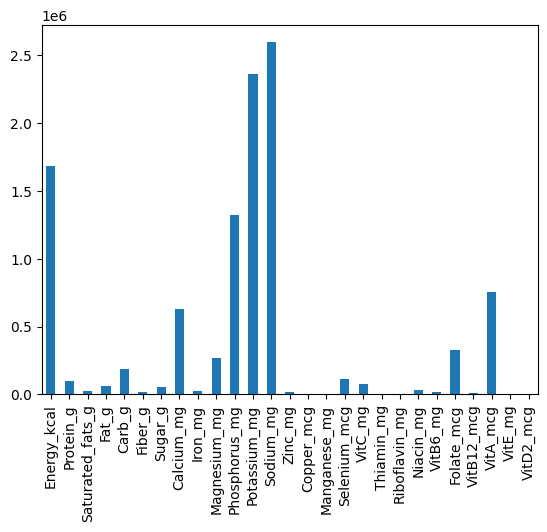

In [331]:
df.loc[:, nutr].sum().plot.bar()
plt.show()

## Balancing Nutrients

The Food Distribution seems high content of Sodium, Potassium and Phosphorus. We need more balance food distribution for better food recommendation for children.

according to <a href="https://www.fda.gov/food/nutrition-education-resources-materials/sodium-your-diet"> this link</a>. Low Sodium	food is 140 mg of sodium or less. We will remove foods that isn's Low Sodium content.

accoring to <a href="https://www.kidney.org/atoz/content/potassium-ckd-diet#:~:text=A%20food%20that%20is%20considered,have%20more%20potassium%20than%20others."> this link</a>. A food that is considered “high-potassium” generally has 200 mg or more potassium per serving. We will remove foods that has High Potasium, we will set the treshold to 150mg for more balanced data distribution.


In [332]:
low_sod = df.Sodium_mg > 140
df.drop(df.loc[low_sod].index, inplace=True)
high_pot = df.Potassium_mg >= 150
df.drop(df.loc[high_pot].index, inplace=True)

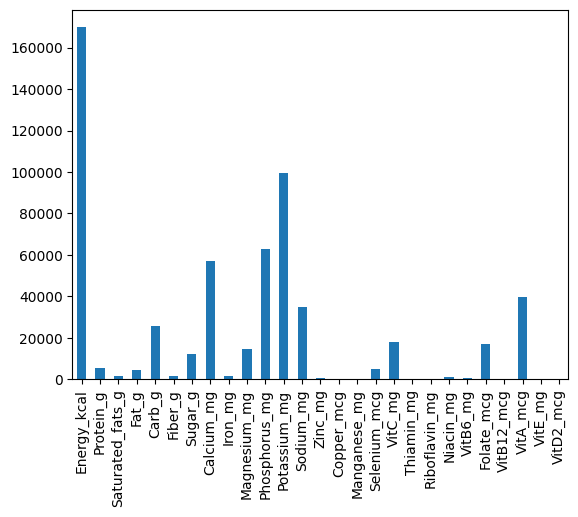

In [333]:
df.loc[:, nutr].sum().plot.bar()
plt.show()
plt.show()

The food distribution looks more balance now. The Phosporus may come from foods that high Potassium or Sodium, so it's automatically balanced.

In [334]:
df.drop(['NDB_No'], axis=1, inplace=True)
df

,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,Iron_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
35,cheese ricotta whole milk,174.000,11.26,8.295,12.98,3.04,0.0,0.27,207.00,0.38,...,0.0,0.013,0.195,0.104,0.043,12.0,0.34,120.0,0.11,0.2
36,cheese ricotta part skim milk,138.000,11.39,4.927,7.91,5.14,0.0,0.31,272.00,0.44,...,0.0,0.021,0.185,0.078,0.020,13.0,0.29,107.0,0.07,0.1
48,cream fluid half and half,123.000,3.13,7.032,10.39,4.73,0.0,4.13,107.00,0.05,...,0.9,0.030,0.194,0.109,0.050,3.0,0.19,97.0,0.25,0.0
49,cream fluid lt (coffee crm or table crm),191.000,2.96,10.176,19.10,2.82,0.0,3.67,91.00,0.05,...,0.8,0.023,0.190,0.090,0.044,2.0,0.14,181.0,0.12,1.1
50,cream fluid lt whipping,292.000,2.17,19.337,30.91,2.96,0.0,2.96,69.00,0.03,...,0.6,0.024,0.125,0.042,0.028,4.0,0.20,279.0,0.88,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,oyster,60.228,9.51,1.087,2.44,0.00,0.0,0.00,126.00,0.90,...,0.0,0.060,0.070,0.710,145.000,1612.0,0.00,0.0,1.11,0.0
9300,tiger prawns orange,64.530,14.25,0.177,0.74,0.00,0.0,0.00,71.89,0.39,...,0.0,0.030,0.030,1.180,112.000,807.0,0.00,0.0,2.87,0.0
9305,squid hard shell,76.480,16.82,0.227,0.93,0.00,0.0,0.00,8.73,0.62,...,0.0,0.020,0.020,0.650,41.500,622.0,0.00,0.0,0.55,0.0
9306,squid red,78.631,16.25,0.448,1.44,0.00,0.0,0.00,14.15,0.26,...,0.0,0.030,0.020,0.710,101.000,1300.0,0.00,0.0,0.47,0.0


In [335]:
df.to_csv("dataset/cleaned_data.csv")

# User-Content Dataset

Before we make a recommendation-system Model. We have to create content-based user data first.

According to <a href="https://www.redoxon.co.id/lebih-sehat-setiap-hari/tabel-kebutuhan-gizi-berdasarkan-usia-anak/">this website</a>, balanced children's nutritions are :

1. Children age <= 6 years old.

<table border="2">
    <tr>    
        <th rowspan="2" align="center">
            Macronutrient Needs
        </th>
        <th align="center" colspan="2">
            Micronutrient Needs
        </th>
    </tr>
    <tr>
    <th>
        Vitamin
    </th>
    <th>
        Mineral
    </th>
    </tr>
    <tr>
        <td>Calories: 1400 kkal</td>
        <td>Vitamin A: 450 mcg</td>
        <td>Calcium: 1000mg</td>
    </tr>
     <tr>
        <td>Protein: 25 gr</td>
        <td>Vitamin D: 15 mcg</td>
        <td>Phosphorus: 500 mg</td>
    </tr> <tr>
        <td>Fat: 50 gr</td>
        <td>Vitamin E: 7 mg</td>
        <td>Sodium: 900 mg</td>
    </tr> <tr>
        <td>Carbo: 220 gr</td>
        <td>vitamin K: 20 mcg</td>
        <td>Potassium: 2700 mg</td>
    </tr> <tr>
        <td>Fiber: 20 gr</td>
        <td>Vitamin B12: 1.5 mcg</td>
        <td>Iron: 10 mg</td>
    </tr> 
    <tr>
        <td>Water: 1450 ml</td>
        <td>Vitamin C: 45 mg</td>
        <td>Iodine: 120 mcg</td>
    </tr>
    <tr>
        <td colspan="2"></td>
        <td>Zinc:5 mg</td>
    </tr>
</table>


2. Children 7 - 9 yo

<table border="2">
    <tr>    
        <th rowspan="2" align="center">
            Macronutrient Needs
        </th>
        <th align="center" colspan="2">
            Micronutrient Needs
        </th>
    </tr>
    <tr>
    <th>
        Vitamin
    </th>
    <th>
        Mineral
    </th>
    </tr>
    <tr>
        <td>Calories: 1650 kkal</td>
        <td>Vitamin A: 500 mcg</td>
        <td>Calcium: 1000mg</td>
    </tr>
     <tr>
        <td>Protein: 40 gr</td>
        <td>Vitamin D: 15 mcg</td>
        <td>Phosphorus : 500 mg</td>
    </tr> <tr>
        <td>Fat: 55 gr</td>
        <td>Vitamin E: 8 mg</td>
        <td>Sodium: 1000 mg</td>
    </tr> <tr>
        <td>Carbo: 250 gr</td>
        <td>vitamin K: 25 mcg</td>
        <td>Potasium: 3200 mg</td>
    </tr> <tr>
        <td>Fiber: 23 gr</td>
        <td>Vitamin B12: 2.0 mcg</td>
        <td>Iron: 10 mg</td>
    </tr> 
    <tr>
        <td>Water: 1650 ml</td>
        <td>Vitamin C: 45 mg</td>
        <td>Iodine: 120 mcg</td>
    </tr>
    <tr>
        <td colspan="2"></td>
        <td>Zinc:5 mg</td>
    </tr>
</table>


In [336]:
user_df = pd.read_csv('dataset/child_cleaned.csv')
user_df = user_df.rename({'Unnamed: 0': 'user_id'}, axis=1)
user_df

,user_id,Status Gizi,Jenis Kelamin,Tinggi Badan (cm),Umur (bulan),Protein_g,Energy_kcal,Calcium_mg
0,0,3,0,67.022731,1,10.042728,138.042728,1400
1,1,1,1,101.300000,33,70.052000,2214.052000,1001
2,2,3,0,121.200000,53,120.544000,3524.544000,1400
3,3,2,0,93.600000,52,111.488000,3452.488000,1020
4,4,3,0,69.832115,2,12.379854,203.379854,1400
...,...,...,...,...,...,...,...,...
6045,6045,2,0,73.100000,14,33.848000,980.848000,1020
6046,6046,1,1,79.600000,22,47.184000,1498.184000,1001
6047,6047,1,1,100.300000,60,124.012000,3969.012000,1001
6048,6048,1,1,103.100000,37,78.124000,2474.124000,1001


In [337]:
y = user_df.Energy_kcal
y = y.to_numpy()
user_df = user_df.drop('Energy_kcal', axis=1)

In [338]:
food_df = df.reset_index().rename({'index':'food_id'}, axis=1)
food_df

,food_id,Descrip,Energy_kcal,Protein_g,Saturated_fats_g,Fat_g,Carb_g,Fiber_g,Sugar_g,Calcium_mg,...,VitC_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,VitB6_mg,Folate_mcg,VitB12_mcg,VitA_mcg,VitE_mg,VitD2_mcg
0,35,cheese ricotta whole milk,174.000,11.26,8.295,12.98,3.04,0.0,0.27,207.00,...,0.0,0.013,0.195,0.104,0.043,12.0,0.34,120.0,0.11,0.2
1,36,cheese ricotta part skim milk,138.000,11.39,4.927,7.91,5.14,0.0,0.31,272.00,...,0.0,0.021,0.185,0.078,0.020,13.0,0.29,107.0,0.07,0.1
2,48,cream fluid half and half,123.000,3.13,7.032,10.39,4.73,0.0,4.13,107.00,...,0.9,0.030,0.194,0.109,0.050,3.0,0.19,97.0,0.25,0.0
3,49,cream fluid lt (coffee crm or table crm),191.000,2.96,10.176,19.10,2.82,0.0,3.67,91.00,...,0.8,0.023,0.190,0.090,0.044,2.0,0.14,181.0,0.12,1.1
4,50,cream fluid lt whipping,292.000,2.17,19.337,30.91,2.96,0.0,2.96,69.00,...,0.6,0.024,0.125,0.042,0.028,4.0,0.20,279.0,0.88,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,9298,oyster,60.228,9.51,1.087,2.44,0.00,0.0,0.00,126.00,...,0.0,0.060,0.070,0.710,145.000,1612.0,0.00,0.0,1.11,0.0
1443,9300,tiger prawns orange,64.530,14.25,0.177,0.74,0.00,0.0,0.00,71.89,...,0.0,0.030,0.030,1.180,112.000,807.0,0.00,0.0,2.87,0.0
1444,9305,squid hard shell,76.480,16.82,0.227,0.93,0.00,0.0,0.00,8.73,...,0.0,0.020,0.020,0.650,41.500,622.0,0.00,0.0,0.55,0.0
1445,9306,squid red,78.631,16.25,0.448,1.44,0.00,0.0,0.00,14.15,...,0.0,0.030,0.020,0.710,101.000,1300.0,0.00,0.0,0.47,0.0


In [342]:
food_df = food_df.to_numpy()
user_df = user_df.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [343]:
item_train = food_df[:, 2:]
user_train = user_df[:, 4:]
y_train = y

In [345]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# scale training data
item_train_unscaled = item_train
user_train_unscaled = user_train
y_train_unscaled    = y_train

scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)

scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.reshape(-1, 1))
#ynorm_test = scalerTarget.transform(y_test.reshape(-1, 1))

# print(np.allclose(item_train_unscaled, scalerItem.inverse_transform(item_train)))
# print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))

In [346]:
item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"food/item training data shape: {item_train.shape}")
print(f"food/item test data shape: {item_test.shape}")

food/item training data shape: (1157, 27)
food/item test data shape: (290, 27)


In [349]:
num_user_features = user_train.shape[1]  # remove userid, rating count and ave rating during training
num_item_features = item_train.shape[1]  # remove movie id at train time

In [350]:
# GRADED_CELL
# UNQ_C1
import tensorflow as tf
num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###     
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs),
  
  
    ### END CODE HERE ###  
])

item_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###     
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs),

    ### END CODE HERE ###  
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 27)]                 0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 32)                   38048     ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 32)                   44192     ['input_2[0][0]']             
                                                                                              

In [352]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [358]:
y = tf.stack(y)
user_train = tf.stack(user_train)
item_train = tf.stack(item_train)

In [361]:
tf.random.set_seed(1)
model.fit([user_train[:1000], item_train[:1000]], y_train[:1000], epochs=30)

Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 9.3444e-04
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/30
32/32 [==============================] - 0s 3ms/step - loss: 5.2289e-04
Epoch 6/30
32/32 [==============================] - 0s 3ms/step - loss: 3.0852e-04
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 3.0492e-04
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 2.5863e-04
Epoch 9/30
32/32 [==============================] - 0s 4ms/step - loss: 3.5548e-04
Epoch 10/30
32/32 [==============================] - 0s 4ms/step - loss: 3.8318e-04
Epoch 11/30
32/32 [==============================] - 0s 3ms/step - loss: 2.2104e-04
Epoch 12/30
32/32 [==============================] - 0s 3ms/step - loss: 1.6589e-04
Epoch 13/30
3

In [373]:
len(item_test)

290

In [376]:
model.evaluate([user_test[:290], item_test[:290]], y_test[:290])

10/10 [==============================] - 0s 3ms/step - loss: 2.4013e-04


0.00024013342044781893

In [388]:
new_user_id = 5000
new_prot = 111
# new_kal = 945
new_calc = 1000

user_vecs = np.array([[new_user_id, new_prot, new_calc],
                    [new_user_id+6, new_prot+4, new_calc+2],])
user_vecs
suser_vecs = scalerUser.transform(user_vecs)

In [396]:
y_p = model.predict([suser_vecs, item_train[:2]])
y_pu = scalerTarget.inverse_transform(y_p)
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_train[sorted_index]  #using unscaled vectors for display

1/1 [==============================] - 0s 22ms/step


In [399]:
sorted_items

<tf.Tensor: shape=(), dtype=float64, numpy=-0.38913007656464427>

In [380]:
# generate and replicate the user vector to match the number movies in the data set.

# scale our user and item vectors
suser_vecs = scalerUser.transform(user_vecs)
sitem_vecs = scalerItem.transform(item_vecs)

# make a prediction
y_p = model.predict([suser_vecs[:, u_s:], sitem_vecs[:, i_s:]])

# unscale y prediction 
y_pu = scalerTarget.inverse_transform(y_p)

# sort the results, highest prediction first
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #negate to get largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display
sorted_items
# print_pred_movies(sorted_ypu, sorted_items, movie_dict, maxcount = 10)

NameError: name 'gen_user_vecs' is not defined

### Scaling Data

In [65]:
# food_df = df.drop(['Saturated_fats_g', 'Sugar_g','Copper_mcg', 'Magnesium_mg', 'Manganese_mg', 'Selenium_mcg', 'Thiamin_mg', 'Riboflavin_mg', 'Niacin_mg', 'VitB6_mg', 'Folate_mcg', 'VitD2_mcg'], axis=1)

## Splitting the Data

### Scaling the Data

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# desc_temp = food_df.Descrip.reset_index(drop=True)
# age_temp = child_df.age.reset_index(drop=True)
# food_df_fit = food_df.rename({"Descrip":"age"}, axis=1)

# combined_df = pd.concat([food_df_fit, child_df])
# combined_df = combined_df.drop('age', axis=1)

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_combined = pd.DataFrame(scaler.fit_transform(combined_df), columns=combined_df.columns)
# scaled_combined
# # combined_df

In [ ]:
scaled_food = scaled_combined[:len(df)]
scaled_child = scaled_combined[len(df):].reset_index(drop=True)
scaled_food

In [ ]:
scaled_food.insert(loc=0, column='desc', value=desc_temp)
scaled_child.insert(loc=0, column='age', value=age_temp)

# Recommendation-System Machine Learning Model

the model will be built using deep-learning content-based filtering. The Data will be preprocessed first before trained to the model.

In the stunting-classifier-model. The children statuses contains:
- normal
- stunted
- highly-stunted
- severly-stunted

<!-- Our aim is to recommend food based on user's status that isn't normal. So,we will create new dataset contains preferred food's content for `stunted, highly-stunted and severly-stunted` children's status.
 -->

<!-- Our aim is to recommend food based on user's status that isn't normal.  -->
<!-- We will denote the User's features as vector, $X_{u} = [ age, gender, height, weight, status ]$ and then compute it as output vector $V_(u)$. 

And similarly for food's features, $X_(m) = [calorie, protein, fat, carb, fiber, ..., vitD2]$ and then compute it as output vector $V_(m)$. We will do so, using neural-network.

$X_(u)\rightarrow V_(u)$ (User Network)

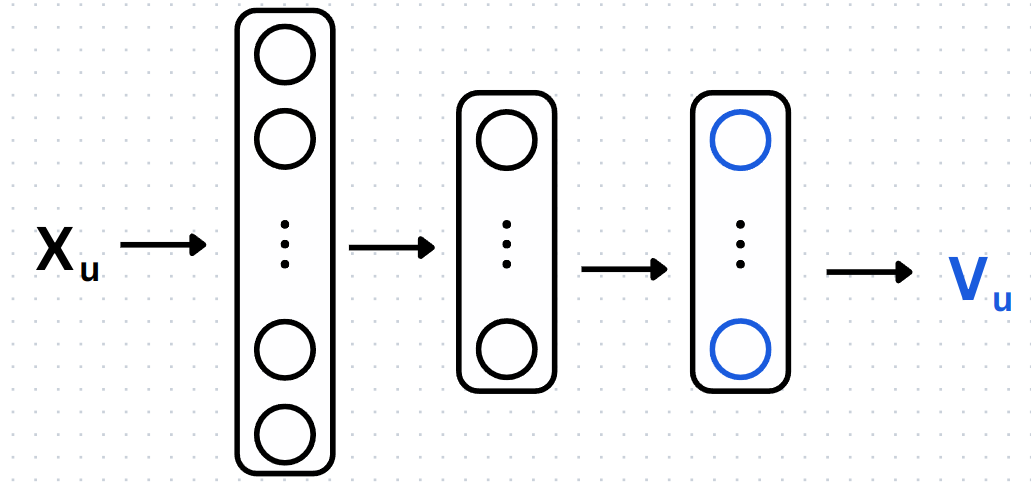

$X_(m)\rightarrow V_(m)$ (Food Network)

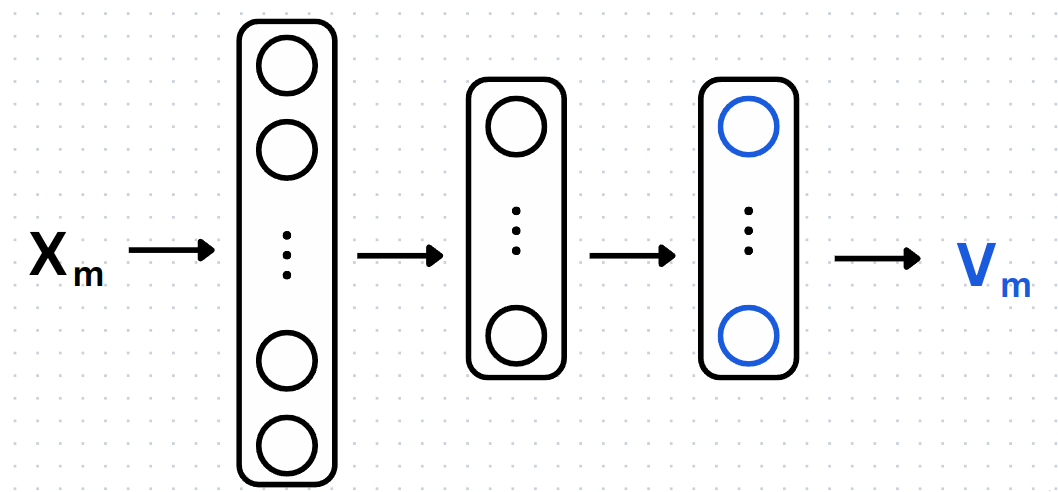


and then we will compute dot products for each output vectors. $V_(u)\cdot V_(m)$ -->

In [ ]:
food_df